
#This project applies a Naive Bayes classification model to the Iris dataset, one of the most well-known datasets in the field of machine learning and statistics.

#The Naive Bayes classifier (**GaussianNB**) is a probabilistic machine learning model based on Bayes’ theorem with the “naive” assumption of feature independence.

#It is best suited for classification problems where features are normally distributed, as is the case in the Iris dataset.



# **Naive Bayes Classification on Iris Dataset**

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline


# **Load and Explore the Dataset**

In [47]:
# Load Iris dataset
iris = load_iris()
data = pd.read_csv("/Iris_Data.csv")
data.head()


,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [48]:
data.shape

(150, 6)

In [49]:
# Check for missing values
data.isnull().sum()


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
target,0
species,0


In [50]:
# Basic statistics
data.describe()


,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# **Data Visualization**

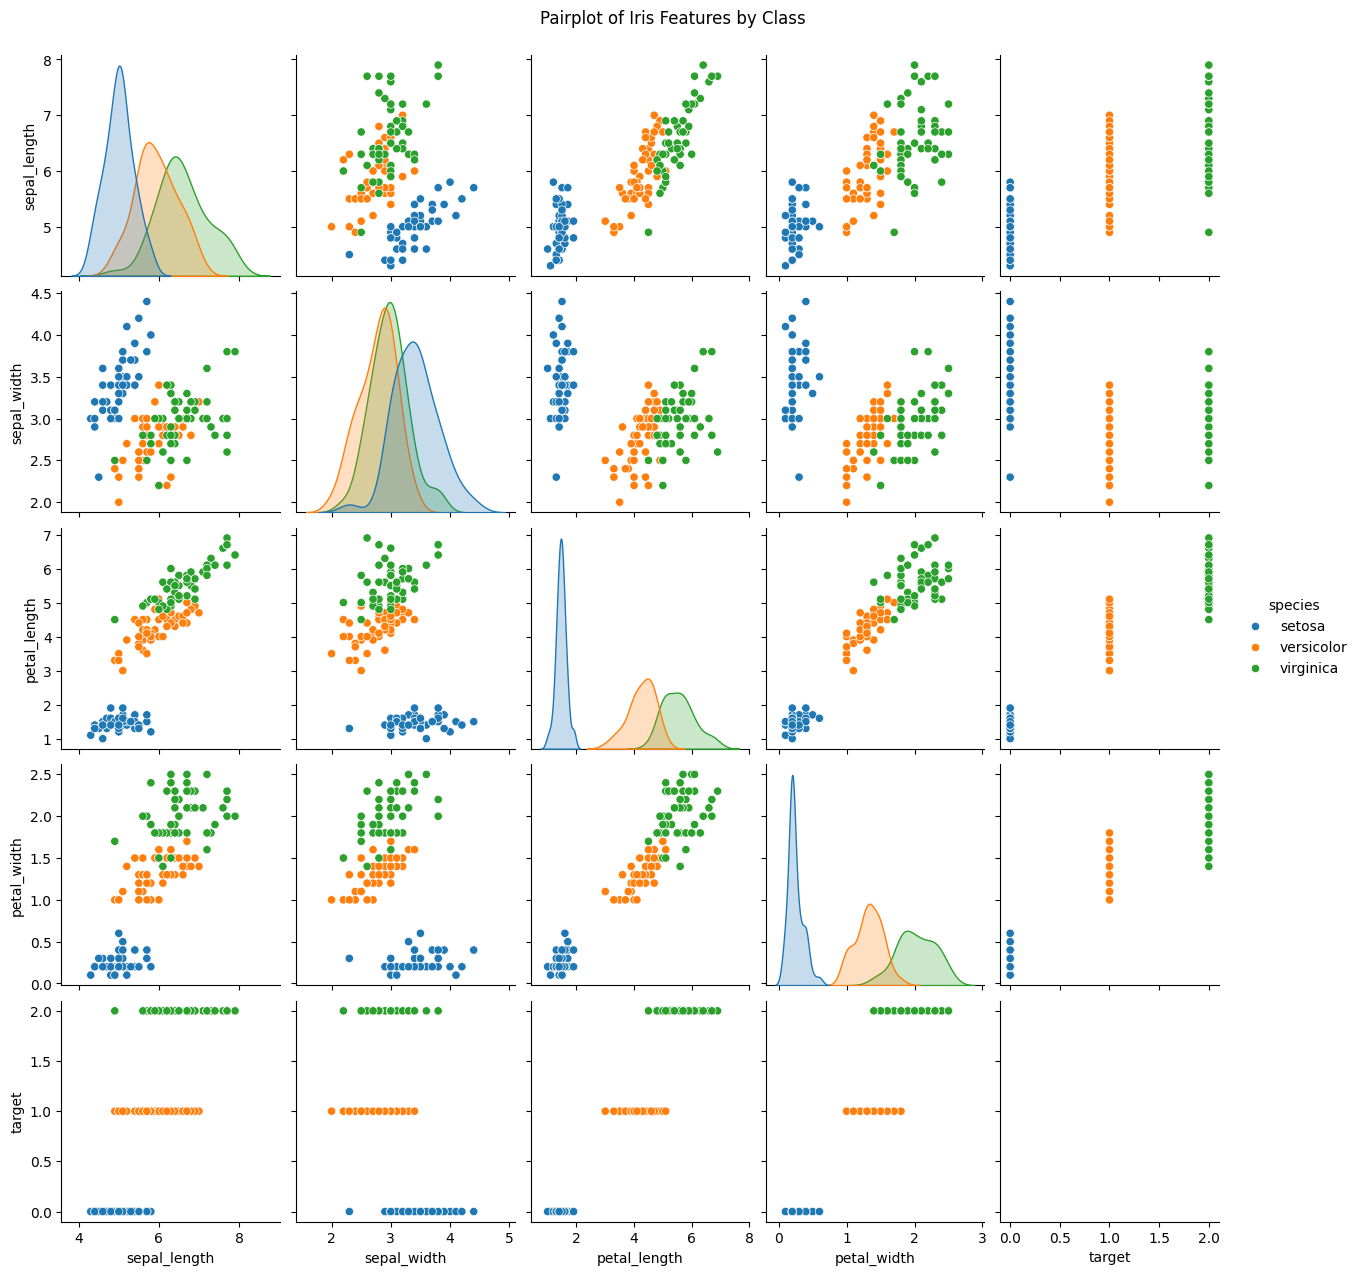

In [51]:
# Pairplot for feature relationships
sns.pairplot(data, hue='species')
plt.suptitle("Pairplot of Iris Features by Class", y=1.02)
plt.show()


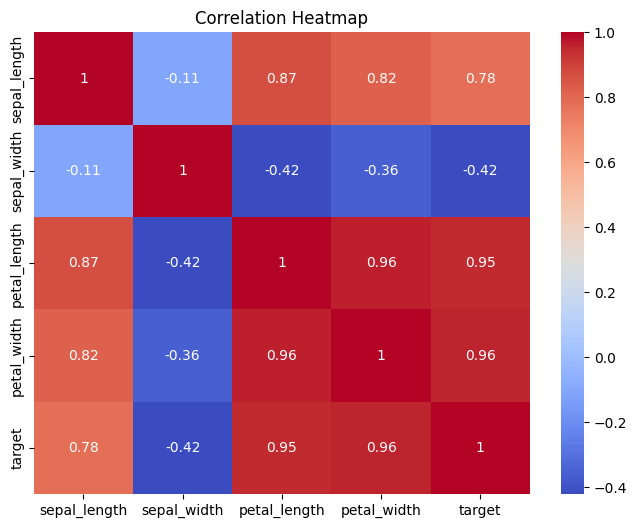

In [52]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# **Model Training and Evaluation**

In [53]:
# Split data
# Split features and target
X = data.drop(columns=['target', 'species'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


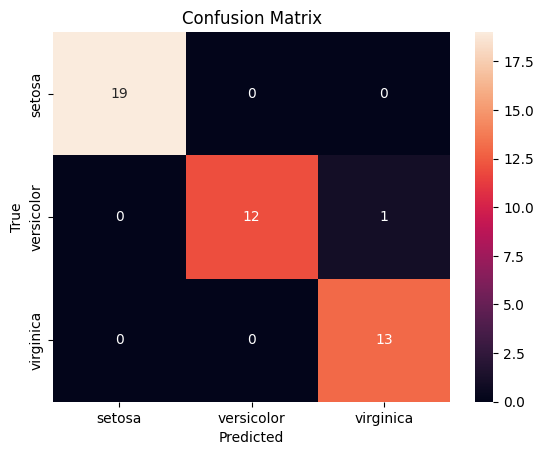

In [54]:
 #Get unique class labels
labels = data['species'].unique()

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [55]:
# Get class names (in order of numeric labels 0, 1, 2)
target_names = data.sort_values('target')['species'].unique()

# Generate report
print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



# **📌 Key Terms:**
Precision: Out of all predicted instances of a class, how many were correct.

Recall: Out of all actual instances of a class, how many were correctly predicted.

F1-score: Harmonic mean of precision and recall — a balance between the two.

Support: Number of actual instances of each class in the test set.

# **📊 Overall Performance**:
Metric	Score
Accuracy	0.98
Macro Avg F1	0.97
Weighted Avg	0.98

Accuracy of 98% is excellent and confirms that the model is very effective on this dataset.

Macro avg treats all classes equally, and the score of 0.97 shows balanced performance.

Weighted avg considers class imbalance (though Iris is fairly balanced), and remains at 0.98.



# **🧠 Conclusion:**
>Naive Bayes is fast, interpretable, and effective for the Iris dataset.

>Despite its simplicity and assumptions, it yields high classification accuracy, making it ideal for small and clean datasets.

>For more complex data with correlated features or non-Gaussian distributions, performance may drop — but here, it's a solid choice.

